In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
resultdir = 'output/'
def plot2(df, x, y, style, pal_num, hue = None,label = "", savename = ""):
    pal = sns.color_palette("cubehelix", pal_num)
    sns.set_style("darkgrid")
    
    fig = sns.lineplot(x, y , data=df, palette=pal, hue=hue, style = style)
    plt.title(label)
    fp = resultdir + savename
    plt.savefig(fp)
    plt.show()
    plt.close()

import os
import pickle
def getresult(fn):
    f = open(os.path.join(resultdir, fn), "rb")
    return pickle.load(f, encoding='latin1')

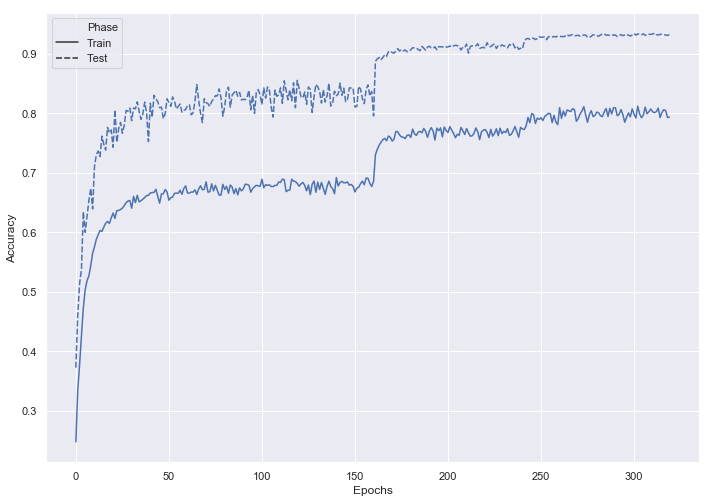

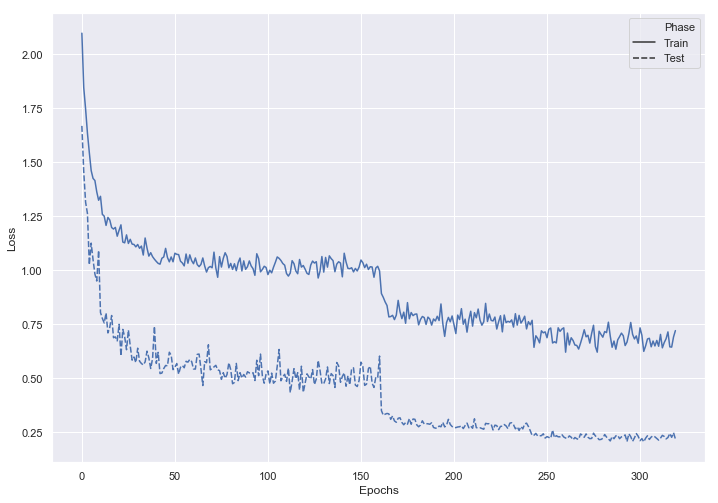

In [24]:
import pandas as pd
import numpy as np

nepochs = 320
filename = "9323_SSResNet20_start_epoch_0_epochs_320.pk"
ra = getresult(filename)

dfe = pd.DataFrame()
dfs = pd.DataFrame()

df1 = pd.DataFrame({"Accuracy":ra['train_acc'],"Phase":'Train' ,"Epochs":list(range(nepochs))})
df2 = pd.DataFrame({"Accuracy":ra['val_acc'], "Phase":'Test' ,"Epochs":list(range(nepochs))})
df3 = pd.DataFrame({"Loss":ra['train_loss'],"Phase":'Train' ,"Epochs":list(range(nepochs))})
df4 = pd.DataFrame({"Loss":ra['val_loss'], "Phase":'Test' ,"Epochs":list(range(nepochs))})

dfe = pd.concat([dfe, df1, df2])
dfs = pd.concat([dfs, df3, df4])
    
plot2(dfe, "Epochs", "Accuracy",  style="Phase", pal_num=1, savename="all3_320_acc")
plot2(dfs, "Epochs", "Loss", style="Phase", pal_num=1, savename="all3_320_loss")

In [ ]:
sns.

In [21]:
ra['train_acc']

[0.25555125,
 0.340841171875,
 0.3814307421875,
 0.4234701171875,
 0.460801875,
 0.48928234375,
 0.50863859375,
 0.5249263671875,
 0.5400355859375,
 0.5616606640625,
 0.573539453125,
 0.5880876953125,
 0.5940554296875,
 0.60007703125,
 0.595993984375,
 0.6035290625,
 0.6102746875,
 0.616336953125,
 0.6152381640625,
 0.630194921875,
 0.632821796875,
 0.6228509765625,
 0.6335167578125,
 0.638511953125,
 0.6392569921875,
 0.6425054296875,
 0.648658046875,
 0.6477287890625,
 0.656144375,
 0.65313796875,
 0.6437427734375,
 0.664792421875,
 0.652239453125,
 0.664103671875,
 0.65878140625,
 0.66039046875,
 0.657551328125,
 0.666229609375,
 0.66927390625,
 0.6675853125,
 0.669965546875,
 0.669934453125,
 0.668863828125,
 0.671597578125,
 0.6641609375,
 0.65439015625,
 0.671484140625,
 0.670247578125,
 0.67618015625,
 0.67424671875,
 0.657160625,
 0.665109375,
 0.6625021875,
 0.666954765625,
 0.667617890625,
 0.6745590625,
 0.672766953125,
 0.6692796875,
 0.677867109375,
 0.677355390625,
 0.669